In [118]:
!pip install yfinance

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


import yfinance as yf
%matplotlib inline

In [12]:
### Datos BTC-USD


#define the ticker symbol
tickerSymbol = 'BTC-USD'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2010-1-1', end='2021-1-25')

#see your data
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0
...,...,...,...,...,...,...,...
2021-01-20,36050.113281,36378.328125,33570.476562,35547.750000,66834573161,0,0
2021-01-21,35549.398438,35552.679688,30250.750000,30825.699219,75643067688,0,0
2021-01-22,30817.625000,33811.851562,28953.373047,33005.761719,77207272511,0,0


In [13]:
### Datos Nasdaq


#define the ticker symbol
tickerSymbol = '^IXIC'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
tickerNQ = tickerData.history(period='1d', start='2010-1-1', end='2021-1-25')

#see your data
tickerNQ

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-12-31,2292.919922,2293.590088,2269.110107,2269.149902,1237820000,0,0
2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,1931380000,0,0
2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2367860000,0,0
2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2253340000,0,0
2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2270050000,0,0
...,...,...,...,...,...,...,...
2021-01-15,13099.900391,13139.830078,12949.759766,12998.500000,6402970000,0,0
2021-01-19,13132.730469,13206.860352,13078.700195,13197.179688,6229100000,0,0
2021-01-20,13342.549805,13486.129883,13329.769531,13457.250000,6771630000,0,0


#### Grafico de correlacion precios Nasdaq y BTC-USD

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


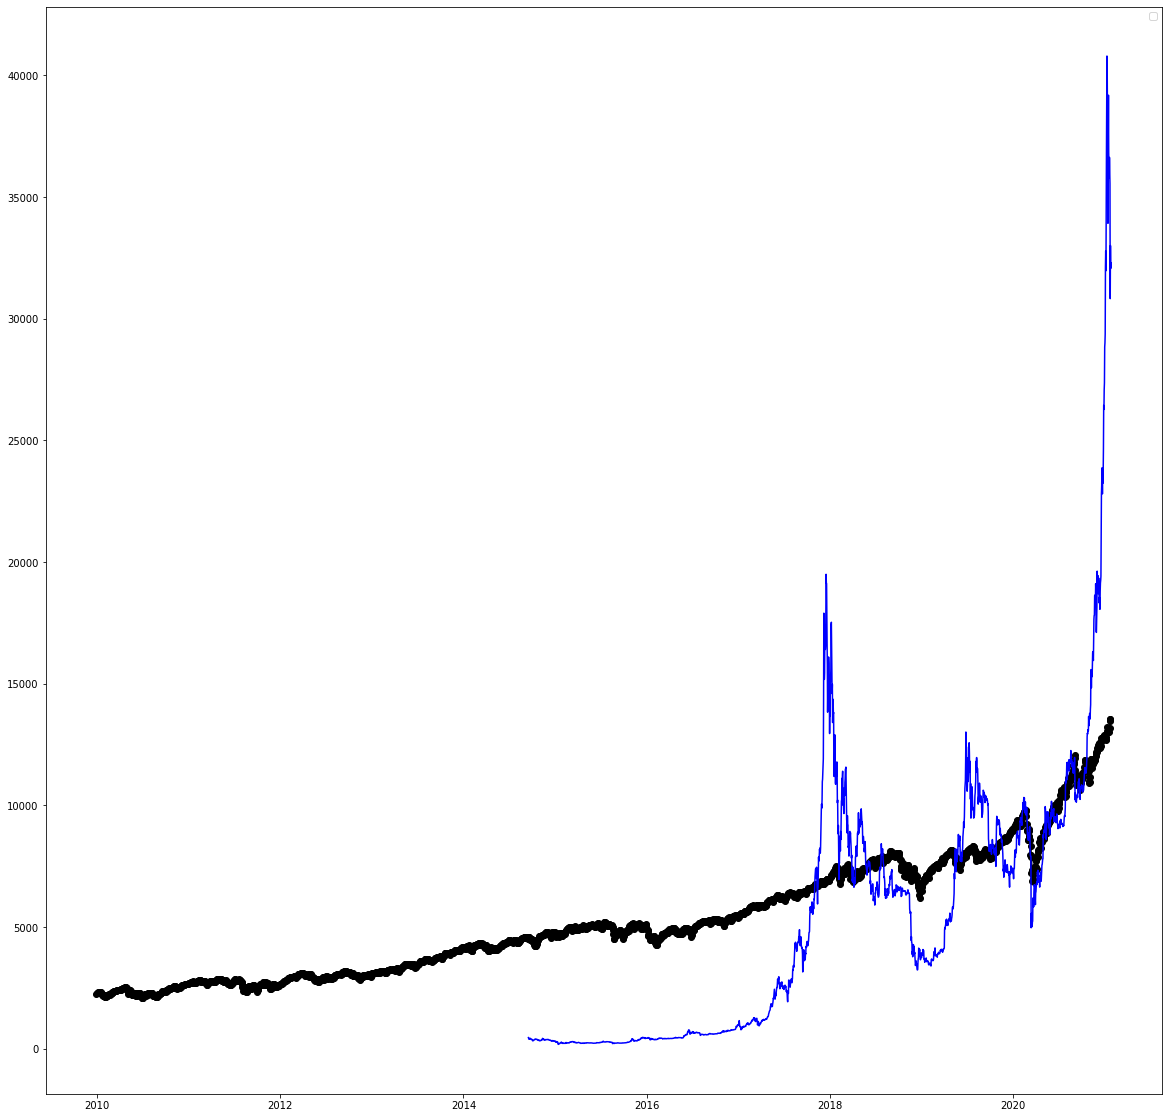

In [4]:
plt.subplots(figsize=(20,20))

plt.plot(tickerNQ.index, tickerNQ.Close,'-ok')
plt.plot(tickerDf.index, tickerDf.Close,color='blue')
plt.legend();

##### Reseteamos indices para que el indice DATE pase a ser columna y poder hacer el merge

In [14]:
tickerNQ=tickerNQ.reset_index()
tickerBTC=tickerDf.reset_index()

In [15]:
print(tickerBTC.head(5))
print(tickerNQ.head(5))

        Date        Open        High         Low       Close    Volume  \
0 2014-09-17  465.864014  468.174011  452.421997  457.334015  21056800   
1 2014-09-18  456.859985  456.859985  413.104004  424.440002  34483200   
2 2014-09-19  424.102997  427.834991  384.532013  394.795990  37919700   
3 2014-09-20  394.673004  423.295990  389.882996  408.903992  36863600   
4 2014-09-21  408.084991  412.425995  393.181000  398.821014  26580100   

   Dividends  Stock Splits  
0          0             0  
1          0             0  
2          0             0  
3          0             0  
4          0             0  
        Date         Open         High          Low        Close      Volume  \
0 2009-12-31  2292.919922  2293.590088  2269.110107  2269.149902  1237820000   
1 2010-01-04  2294.409912  2311.149902  2294.409912  2308.419922  1931380000   
2 2010-01-05  2307.270020  2313.729980  2295.620117  2308.709961  2367860000   
3 2010-01-06  2307.709961  2314.070068  2295.679932  2301.090

In [16]:

tickerNQ.columns=['Date','Open_N',	'High_N',	'Low_N','Close_N',	'Volume_N',	'Dividends_N',	'Stock_Splits_N']


tickerBTC.columns=['Date','Open_B',	'High_B',	'Low_B','Close_B',	'Volume_B',	'Dividends_B',	'Stock_Splits_B']



In [18]:
dataset= pd.concat([tickerNQ, tickerBTC])
dataset=dataset.groupby(dataset.index)
junte = pd.merge(tickerBTC,tickerNQ)

<AxesSubplot:>

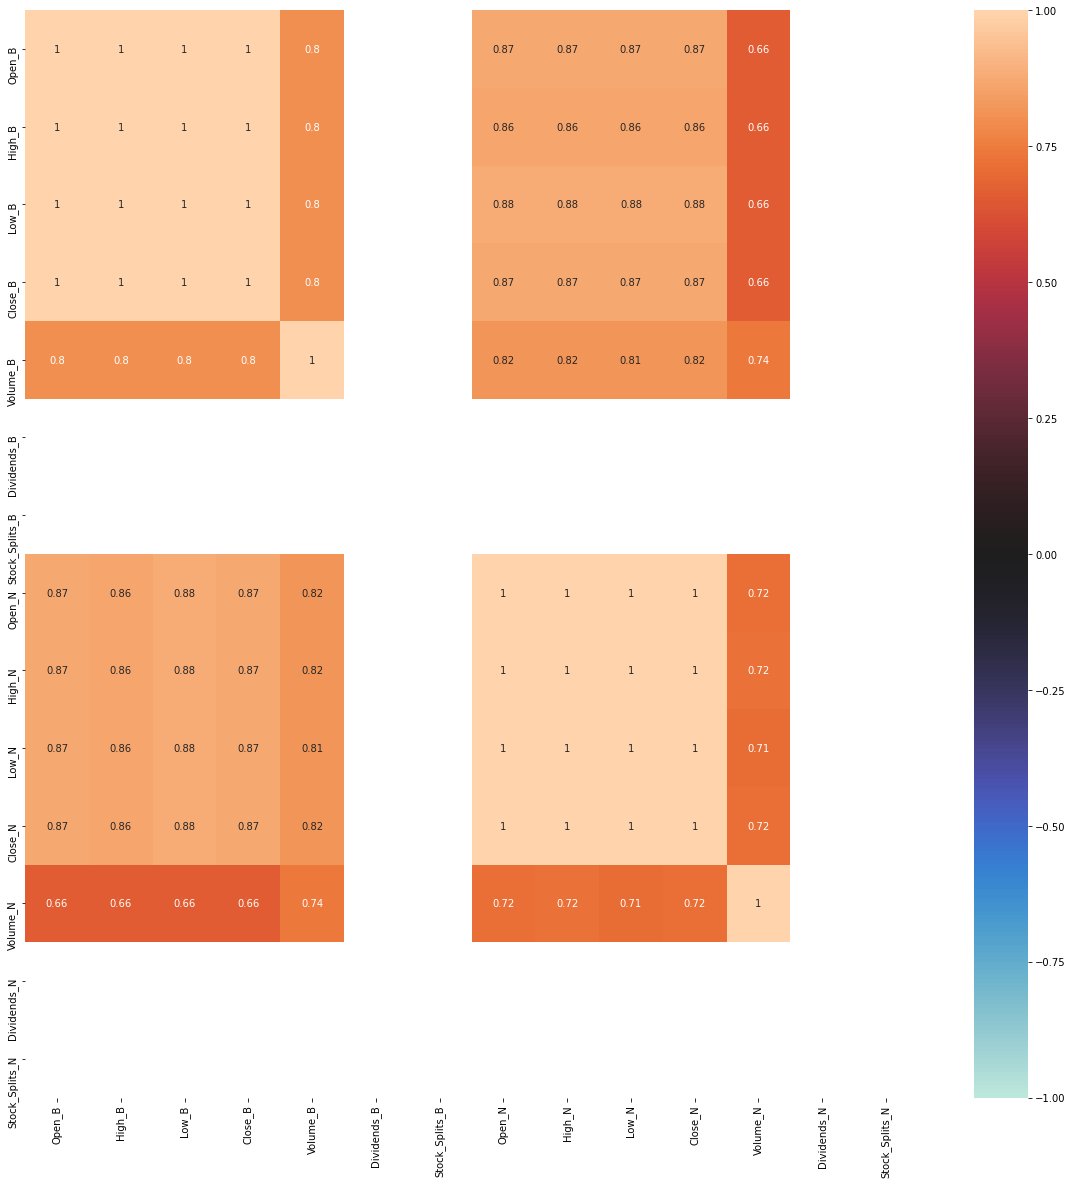

In [26]:
plt.subplots(figsize=(20,20))
sns.heatmap(data=junte.corr(),center=0,annot=True, vmin=-1,
            vmax=1)


In [1]:
sns.pairplot(junte,
             kind="reg") 
             

NameError: name 'sns' is not defined